In [20]:
# Dependencies
import requests
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Import CSV as a Dataframe.
Basic_Data_Df = pd.read_csv("cleaned_perth_data.csv")
Basic_Data_Df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30496,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
30497,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0
30498,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997.0,16000,Fremantle Station,1900,02-2019\r,6162,-32.066410,115.756070,FREMANTLE COLLEGE,1.134956,128.0
30499,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0


In [3]:
Basic_Data_Df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.050100e+04,30501.000000,30501.000000,30501.000000,30501.000000,30501.000000,30501.000000,30501.000000,30501.00000,30501.000000,30501.000000,30501.000000,30501.000000,20692.000000
mean,6.386143e+05,3.658765,1.821481,2.034786,2666.813744,183.339890,1989.706436,19622.191633,4471.67306,6088.649028,-31.959879,115.878809,1.786102,72.342016
std,3.572230e+05,0.749785,0.589998,1.441721,17022.511689,71.991791,20.964330,11301.089517,4416.56821,61.015146,0.176403,0.117600,1.698975,40.661844
min,5.200000e+04,1.000000,1.000000,0.000000,61.000000,1.000000,1868.000000,681.000000,46.00000,6003.000000,-32.472979,115.583610,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,505.000000,130.000000,1978.000000,11100.000000,1800.00000,6050.000000,-32.066110,115.789340,0.873962,39.000000
50%,5.390000e+05,4.000000,2.000000,2.000000,683.000000,172.000000,1995.000000,17300.000000,3200.00000,6069.000000,-31.931727,115.853617,1.332680,65.000000
75%,7.650000e+05,4.000000,2.000000,2.000000,835.000000,223.000000,2005.000000,26300.000000,5300.00000,6149.000000,-31.843460,115.970012,2.071003,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,849.000000,2017.000000,59800.000000,35500.00000,6558.000000,-31.465818,116.341780,23.254372,139.000000


In [4]:
MinHousingPrice=Basic_Data_Df['PRICE'].min()
MaxHousingPrice=Basic_Data_Df['PRICE'].max()
AverageHousingPrice=Basic_Data_Df['PRICE'].mean()


In [5]:
Surburbs=Basic_Data_Df["SUBURB"].value_counts()
Surburbs

Bertram          209
Iluka            208
Mindarie         204
Henley Brook     203
Jane Brook       199
                ... 
Kwinana Beach      1
Munster            1
Welshpool          1
Wangara            1
Naval Base         1
Name: SUBURB, Length: 319, dtype: int64

In [6]:
Bedroom_Df = Basic_Data_Df.groupby(["BEDROOMS"]).mean()
Bedroom_Df

Bathroom_Df = Basic_Data_Df.groupby(["BATHROOMS"]).mean()
Bathroom_Df


C:\Users\Adam Mayer\AppData\Local\Temp\ipykernel_26752\2645396288.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Bedroom_Df = Basic_Data_Df.groupby(["BEDROOMS"]).mean()
C:\Users\Adam Mayer\AppData\Local\Temp\ipykernel_26752\2645396288.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Bathroom_Df = Basic_Data_Df.groupby(["BATHROOMS"]).mean()


,PRICE,BEDROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
BATHROOMS,,,,,,,,,,,,,
1,4.947870e+05,3.023865,1.568196,2165.107085,128.904414,1974.400025,17869.086435,4034.546927,6091.628045,-31.977359,115.896060,1.584875,74.914480
2,6.412313e+05,3.816991,2.157748,2719.325411,193.392128,1995.699751,20697.464076,4669.323966,6088.549228,-31.954221,115.874500,1.857935,73.748491
3,1.093523e+06,4.433127,2.544979,3406.930985,277.584484,1990.932889,16309.658258,4182.617801,6079.154688,-31.949737,115.855665,1.814873,54.342769
4,1.285879e+06,4.918269,2.990385,8529.091346,347.451923,1993.384615,18084.947115,5118.211538,6079.951923,-31.931634,115.852579,2.322367,52.345455
5,1.245209e+06,5.629630,3.185185,11648.703704,376.518519,1998.592593,16607.407407,5582.185185,6072.888889,-31.932376,115.905150,2.347202,57.105263
6,1.454600e+06,6.400000,3.400000,1089.600000,382.400000,1981.600000,13080.000000,4840.000000,6114.400000,-32.016159,115.861456,1.723832,113.666667
7,6.855000e+05,5.000000,1.000000,841.500000,286.000000,1974.000000,18500.000000,10050.000000,6088.500000,-31.926910,116.052170,1.322462,57.000000
16,3.000000e+05,4.000000,1.000000,745.000000,95.000000,1977.000000,12000.000000,2500.000000,6054.000000,-31.878020,115.951170,1.519215,NaN


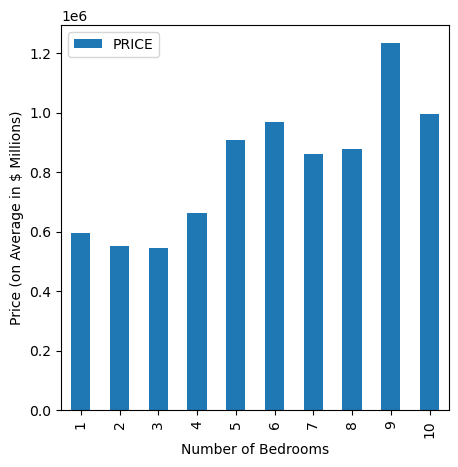

<Figure size 640x480 with 0 Axes>

In [7]:
PriceBedroom_Df=Bedroom_Df.drop(['GARAGE','BUILD_YEAR','POSTCODE','NEAREST_SCH_RANK', 'LATITUDE','LONGITUDE',
                                 'LAND_AREA','FLOOR_AREA', 'CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH_DIST','BATHROOMS'], axis=1)

PriceBedroom_Df


PandaBedroom_chart = PriceBedroom_Df.plot(kind='bar', figsize=(5,5))
PandaBedroom_chart.set_xlabel("Number of Bedrooms")
PandaBedroom_chart.set_ylabel("Price (on Average in $ Millions)")

plt.show() 
plt.tight_layout()

In [8]:
PriceBedroom_Df['PRICE'] = PriceBedroom_Df['PRICE'].map('${:,.2f}'.format)

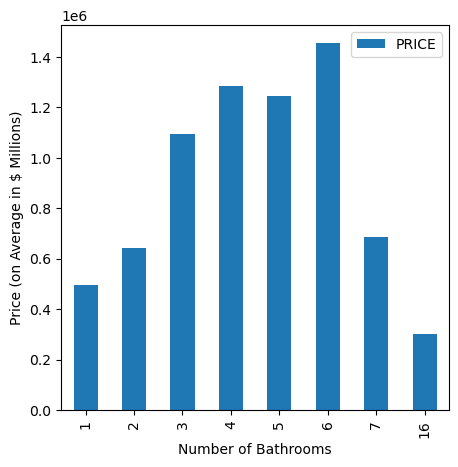

<Figure size 640x480 with 0 Axes>

In [9]:
PriceBathroom_Df=Bathroom_Df.drop(['GARAGE','BUILD_YEAR','POSTCODE','NEAREST_SCH_RANK', 'LATITUDE','LONGITUDE',
                                 'LAND_AREA','FLOOR_AREA', 'CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH_DIST','BEDROOMS'], axis=1)
PriceBathroom_Df

PandaBathroom_chart = PriceBathroom_Df.plot(kind='bar', figsize=(5,5))
PandaBathroom_chart.set_xlabel("Number of Bathrooms")
PandaBathroom_chart.set_ylabel("Price (on Average in $ Millions)")

plt.show() 
plt.tight_layout()

In [10]:
groupedSUBURB_df = Basic_Data_Df.groupby(["SUBURB"]).mean(numeric_only=True)
groupedSUBURB_df
# print(grouped_SUBURB_df)


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
SUBURB,,,,,,,,,,,,,,
Alexander Heights,4.490973e+05,3.752212,1.831858,2.088496,625.787611,166.530973,1993.212389,13950.442478,7083.185841,6064.0,-31.827133,115.864632,1.915156,64.125000
Alfred Cove,8.493350e+05,3.560000,1.800000,1.920000,577.790000,186.260000,1988.640000,9751.550000,3867.360000,6154.0,-32.033900,115.815981,1.492035,48.310000
Alkimos,4.142292e+05,3.625000,1.968750,1.864583,10647.875000,177.593750,2013.395833,40803.125000,2593.322917,6038.0,-31.615747,115.687668,4.421420,39.000000
Anketell,1.005267e+06,4.133333,2.133333,2.666667,20896.400000,280.933333,1998.333333,29373.333333,3926.666667,6167.0,-32.215547,115.877233,5.623532,NaN
Applecross,1.396130e+06,3.712329,2.246575,2.342466,703.917808,226.753425,1988.342466,7106.849315,1772.904110,6153.0,-32.013490,115.838477,1.845389,38.301370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wooroloo,4.116774e+05,3.870968,1.645161,2.064516,24271.387097,157.548387,1975.935484,45861.290323,30941.935484,6558.0,-31.801048,116.311440,11.864059,105.000000
Wungong,6.704650e+05,4.500000,2.000000,1.944444,13261.222222,242.166667,1979.722222,29444.444444,3138.888889,6112.0,-32.181590,116.014520,2.274480,NaN
Yanchep,3.906562e+05,3.708333,1.895833,1.864583,583.000000,180.208333,2007.812500,50018.750000,11777.083333,6035.0,-31.544042,115.638093,1.578088,NaN


The correlation between Housing Price and Floor area by square metre (on Surburb average): 0.5369852539249266


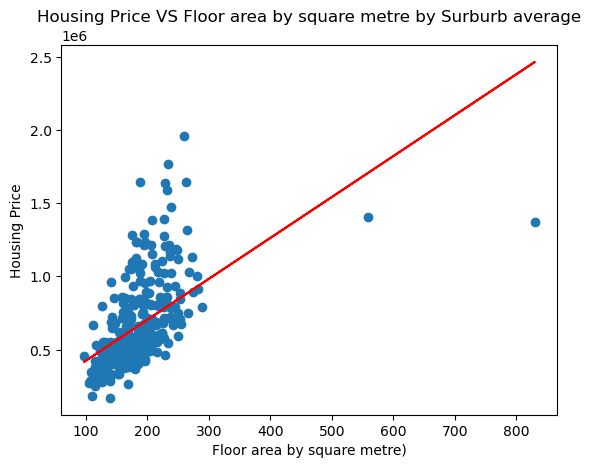

In [21]:
scatter_bath=groupedSUBURB_df["BATHROOMS"] 
scatter_price=groupedSUBURB_df["PRICE"]
scatter_floor=groupedSUBURB_df["FLOOR_AREA"] 
scatter_bed=groupedSUBURB_df["BEDROOMS"] 

plt.ylabel("Housing Price")
plt.xlabel("Floor area by square metre)")


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_floor, scatter_price)
regress_values = scatter_floor * slope + intercept
plt.plot(scatter_floor,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and Floor area by square metre (on Surburb average): {rvalue}")


plt.scatter(scatter_floor,scatter_price) 
plt.title("Housing Price VS Floor area by square metre by Surburb average")
plt.show()

The correlation between Housing Price and Floor area by square metre : 0.5539040862754584


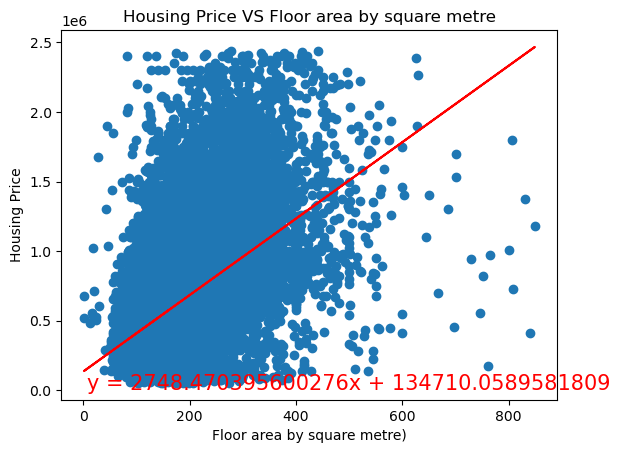

In [23]:
scatter_basicland=Basic_Data_Df["LAND_AREA"] 
scatter_basicprice=Basic_Data_Df["PRICE"]
scatter_basicfloor=Basic_Data_Df["FLOOR_AREA"] 
scatter_basicbath=Basic_Data_Df["BATHROOMS"] 
scatter_basicbed=Basic_Data_Df["BEDROOMS"] 
plt.ylabel("Housing Price")
plt.xlabel("Floor area by square metre)")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_basicfloor, scatter_basicprice)
regress_values = scatter_basicfloor * slope + intercept
plt.plot(scatter_basicfloor,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and Floor area by square metre : {rvalue}")

plt.scatter(scatter_basicfloor,scatter_basicprice) 
plt.title("Housing Price VS Floor area by square metre")
plt.show()

The correlation between Housing Price and the number of bathrooms (on Surburb average): 0.42274775675874326


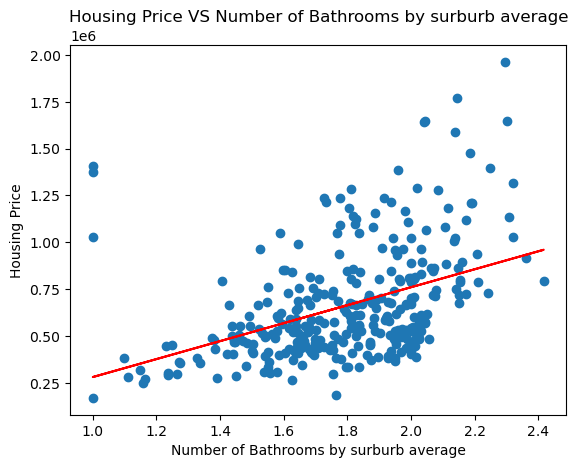

In [28]:
plt.ylabel("Housing Price")
plt.xlabel("Number of Bathrooms by surburb average")
plt.scatter(scatter_bath,scatter_price)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_bath, scatter_price)
regress_values = scatter_bath * slope + intercept
plt.plot(scatter_bath,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and the number of bathrooms (on Surburb average): {rvalue}")


plt.title("Housing Price VS Number of Bathrooms by surburb average")
plt.show()

The correlation between Housing Price and the number of bathrooms : 0.3810301987576163


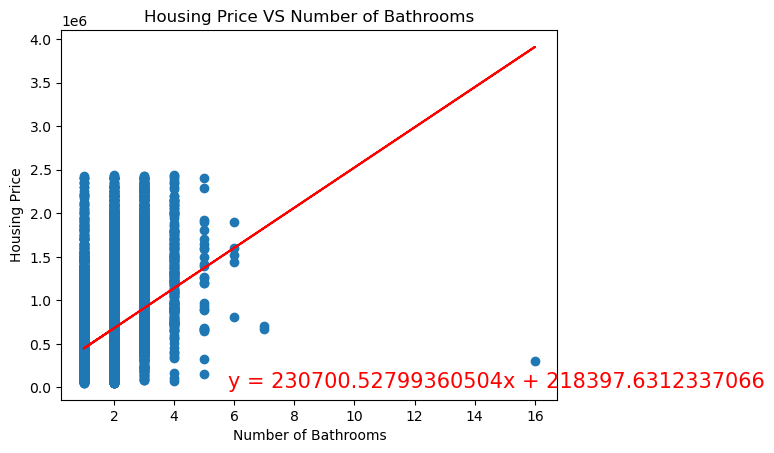

In [27]:
plt.ylabel("Housing Price")
plt.xlabel("Number of Bathrooms")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_basicbath, scatter_basicprice)
regress_values = scatter_basicbath * slope + intercept
plt.plot(scatter_basicbath,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and the number of bathrooms : {rvalue}")

plt.scatter(scatter_basicbath,scatter_basicprice) 
plt.title("Housing Price VS Number of Bathrooms")
plt.show()

The correlation between Housing Price and the number of bedrooms (on Surburb average): 0.0946004209059506


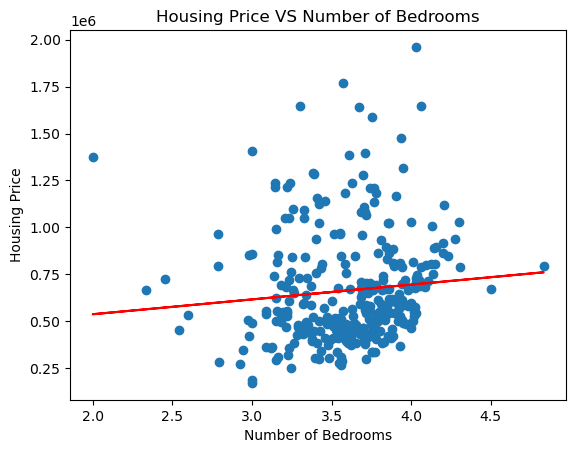

In [25]:
plt.ylabel("Housing Price")
plt.xlabel("Number of Bedrooms")
plt.scatter(scatter_bed,scatter_price) 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_bed, scatter_price)
regress_values = scatter_bed * slope + intercept
plt.plot(scatter_bed,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and the number of bedrooms (on Surburb average): {rvalue}")

plt.title("Housing Price VS Number of Bedrooms")
plt.show()

The correlation between Housing Price and the number of bedrooms is: 0.2554521322748398


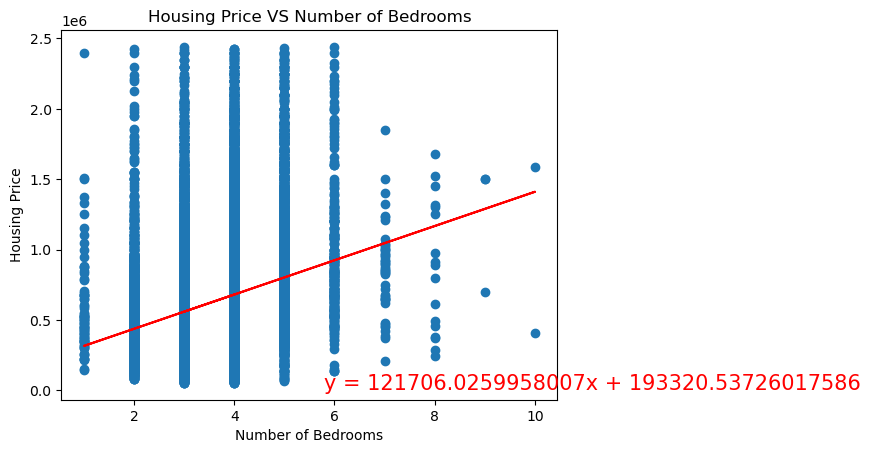

In [24]:
plt.ylabel("Housing Price")
plt.xlabel("Number of Bedrooms")
plt.scatter(scatter_basicbed,scatter_basicprice) 

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_basicbed, scatter_basicprice)
regress_values = scatter_basicbed * slope + intercept
plt.plot(scatter_basicbed,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and the number of bedrooms is: {rvalue}")


plt.title("Housing Price VS Number of Bedrooms")
plt.show()

In [ ]:

AllpriceDF=groupedSUBURB_df.drop(['GARAGE','BUILD_YEAR','POSTCODE','NEAREST_SCH_RANK', 'LATITUDE','LONGITUDE',
                                 'LAND_AREA','FLOOR_AREA', 'CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH_DIST','BEDROOMS','BATHROOMS'], axis=1)

AllpriceDF.head()


In [ ]:
tophalf=AllpriceDF.loc[AllpriceDF["PRICE"] >= 1000000]
tophalf
PandaBar_chart = tophalf.plot(kind='bar', figsize=(10,10))
PandaBar_chart.set_xlabel("Surburb")
PandaBar_chart.set_ylabel("Price")
plt.show()
plt.tight_layout()

In [ ]:
bottomhalf=AllpriceDF.loc[AllpriceDF["PRICE"] <= 400000]
bottomhalf
PandaBar_chart = bottomhalf.plot(kind='bar', figsize=(10,10))
PandaBar_chart.set_xlabel("Surburb")
PandaBar_chart.set_ylabel("Price")
plt.show()
plt.tight_layout()